**Project Two | Data Mining**

Name : Joseph Sako

In [1]:
# Start imports ...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# End imports .

S T E P ( 1 ) ...

In [3]:
# Load the stroke dataset .

stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [4]:
stroke_data["bmi"] = stroke_data["bmi"].apply(lambda x: 50 if x > 50 else x)
stroke_data["avg_glucose_level"] = stroke_data["avg_glucose_level"].apply(lambda x: 175 if x > 175 else x)

In [5]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

In [6]:
le = LabelEncoder()
i = 0
for col_name in stroke_data.columns[i:]:
  if (stroke_data[col_name].dtype == 'object'):
    stroke_data[col_name] = le.fit_transform(stroke_data[col_name])

In [7]:
scaler = StandardScaler()
stroke_data[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(stroke_data[["age", "avg_glucose_level", "bmi"]])

In [8]:
stroke_data[['age', 'avg_glucose_level', 'bmi']] = stroke_data[['age', 'avg_glucose_level', 'bmi']].apply(lambda x: x/x.max(), axis = 0)

In [9]:
x = stroke_data.drop(['id'], axis = 1)
y = stroke_data['stroke']

In [10]:
# Split the dataset into training and testing sets .

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [11]:
# Being that the dataset is imbalanced , solve this problem by using SMOTE .

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('The shape of x_train after oversampling : {}'.format(x_train_res.shape))
print('The shape of y_train after oversampling : {}'.format(y_train_res.shape))
print("\nCounts of label '0' after oversampling : {}".format(sum(y_train_res == 0)))
print("Counts of label '1' after oversampling : {}".format(sum(y_train_res == 1)))

The shape of x_train after oversampling : (7786, 11)
The shape of y_train after oversampling : (7786,)

Counts of label '0' after oversampling : 3893
Counts of label '1' after oversampling : 3893


S T E P ( 2 ) ...

In [12]:
# Build a Logistic Regression model using the training set .

lr = LogisticRegression()
lr.fit(x_train_res, y_train_res)
y_predict_test = lr.predict(x_test)
lrs, lrt, _ = roc_curve(y_test, y_predict_test)
accuracy_test = accuracy_score(y_test, y_predict_test)
print('Accuracy ( testing ) : ', accuracy_test.round(4))

y_predict_train = lr.predict(x_train_res)
accuracy_train = accuracy_score(y_train_res, y_predict_train)
### print('Accuracy ( training ) : ', accuracy_train.round(4))

ras = roc_auc_score(y_test, y_predict_test)
print('ROC AUC Score : ', ras)

f1 = f1_score(y_test, y_predict_test)
print('F1 Score : ', f1)

Accuracy ( testing ) :  1.0
ROC AUC Score :  1.0
F1 Score :  1.0


In [13]:
# Build a Naive Bayes model using the training set .

nb = GaussianNB()
nb.fit(x_train, y_train)
y_predict_nb = nb.predict(x_test)

second_accuracy_test = accuracy_score(y_test, y_predict_nb)
print('Accuracy ( testing ) : ', second_accuracy_test.round(4))

nbr, nbm, _ = roc_curve(y_test, y_predict_nb)
second_y_predict_train = nb.predict(x_train_res)
second_accuracy_train = accuracy_score(y_train_res, second_y_predict_train)
### print('Accuracy ( training ) : ', second_accuracy_train.round(4))

second_ras = roc_auc_score(y_test, y_predict_nb)
print('ROC AUC Score : ', second_ras)

second_f1 = f1_score(y_test, y_predict_nb)
print('F1 Score : ', second_f1)

Accuracy ( testing ) :  1.0
ROC AUC Score :  1.0
F1 Score :  1.0


In [14]:
# Build a K Nearest Neighbor Classifier model using the training set .

knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train_res, y_train_res)
y_predict_knc = knc.predict(x_test)
knr, knt, _ = roc_curve(y_test, y_predict_knc)
third_accuracy_test = accuracy_score(y_test, y_predict_knc)
print('Accuracy ( testing ) : ', third_accuracy_test.round(4))

third_y_predict_train = knc.predict(x_train_res)
third_accuracy_train = accuracy_score(y_train_res, third_y_predict_train)
### print('Accuracy ( training ) : ', third_accuracy_train.round(4))

third_ras = roc_auc_score(y_test, y_predict_knc)
print('ROC AUC Score : ', third_ras)

third_f1 = f1_score(y_test, y_predict_knc)
print('F1 Score : ', third_f1)

Accuracy ( testing ) :  0.9892
ROC AUC Score :  0.9331190694827057
F1 Score :  0.8952380952380952


In [15]:
# Build a Support Vector Machine Classifier model using the training set .

svc = SVC()
svc.fit(x_train_res, y_train_res)

y_predict_svc = svc.predict(x_test)
svr, svt, _ = roc_curve(y_test, y_predict_svc)
fourth_accuracy_test = accuracy_score(y_test, y_predict_svc)
print('Accuracy ( testing ) : ', fourth_accuracy_test.round(4))

fourth_y_predict_train = svc.predict(x_train_res)
fourth_accuracy_train = accuracy_score(y_train_res, fourth_y_predict_train)
### print('Accuracy ( training ) : ', fourth_accuracy_train.round(4))

fourth_ras = roc_auc_score(y_test, y_predict_svc)
print('ROC AUC Score : ', fourth_ras)

fourth_f1 = f1_score(y_test, y_predict_svc)
print('F1 Score : ', fourth_f1)

Accuracy ( testing ) :  1.0
ROC AUC Score :  1.0
F1 Score :  1.0


S T E P ( 3 ) ...

Upon further evaluation , we can see that the first , second , and fourth models have an equivalent and are of the highest accuracy , AUC-ROC , and F-score . This indicates that these models ( Logistic Regression model , Naive Bayes model , and Support Vector Machine Classifier model ) perform the best on the testing set . The third model ( K Nearest Neighbor Classifier model ) follows behind the other three . It is significant to remember however that the dataset and problem influence the metric of choice . For instance , we could want to emphasize F-score over accuracy if the dataset is highly unbalanced , while we might want to use a different metric entirely if the cost of false positives and false negatives differs .

Overall , we can conclude that all four models perform reasonably well in predicting the outcome variable . However , based on the evaluation metrics , we can see that the K Nearest Neighbor Classifier model perform slightly worse than the others in terms of accuracy , F1-score , and AUC-ROC score . Therefore , we could consider using the first , second , and fourth models for predicting the outcome variable in this particular problem .

S T E P ( 3.5 ) ...

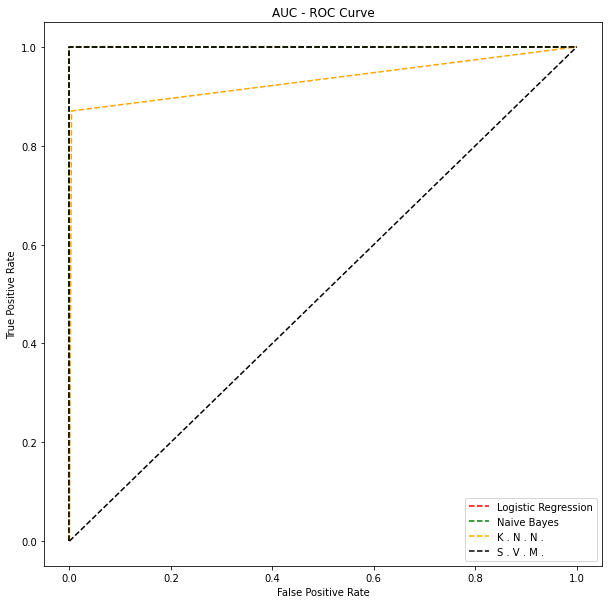

In [36]:
plt.figure(figsize = (10, 10))
plt.plot(lrs, lrt, linestyle = '--', color = 'red', label = 'Logistic Regression')
plt.plot(nbr, nbm, linestyle = '--', color = 'green', label = 'Naive Bayes')
plt.plot(knr, knt, linestyle = '--', color = 'orange', label = 'K . N . N .')
plt.plot(svr, svt, linestyle = '--', color = 'black', label = 'S . V . M .')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - ROC Curve')
plt.legend()
plt.show()

It may be determined here that the first , second , and fourth models all have the highest curves . It is also evident here that the third model falls behind the rest . As a result , we may determine that the Logistic Regression model , Naive Bayes model , and Support Vector Machine Classifier model had done better jobs in classification as compared to the K Nearest Neighbor Classifier model .